In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from matplotlib.colors import SymLogNorm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay


# Read The Data

In [7]:
df_train = pd.read_csv(r'Data\train.csv')
df_test = pd.read_csv(r'Data\test.csv')
df_original = pd.read_csv(r'Data\healthcare-dataset-stroke-data.csv')
df_combined = pd.concat([df_train, df_original], axis=0)
df_sample_submission = pd.read_csv(r'Data\sample_submission.csv')

# Create piecharts to see percentages

([<matplotlib.patches.Wedge at 0x2e1a65cb4c0>,
 [Text(-1.0899053053738155, 0.1486822965857413, ''),
  Text(1.0899052931932507, -0.14868238587450242, '')],
 [Text(-0.5944938029311719, 0.08109943450131343, '95.7%'),
  Text(0.5944937962872275, -0.08109948320427403, '4.3%')])

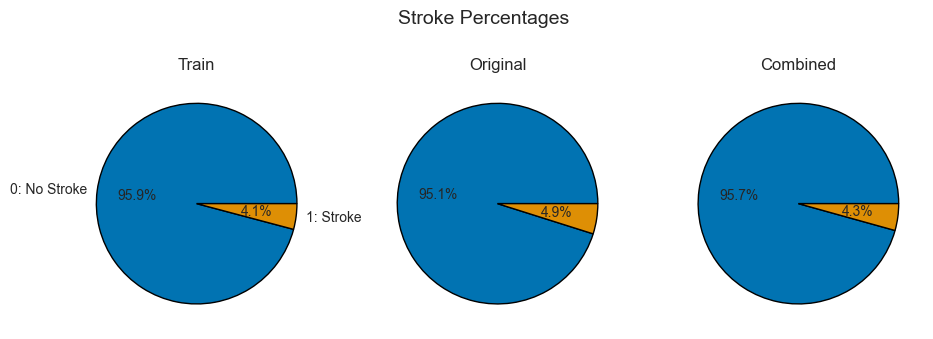

In [8]:
#print(sns.palettes.SEABORN_PALETTES)
colors = sns.palettes.SEABORN_PALETTES['colorblind']

# figure, axes
fig, ax = plt.subplots(1, 3, figsize=(11,4))
# figure title
fig.suptitle('Stroke Percentages', fontsize=14)

# train / original Stroke differences
ax[0].set_title('Train')
ax[1].set_title('Original')
ax[2].set_title('Combined')


plot_data_train = df_train['stroke'].value_counts()
plot_data_original = df_original['stroke'].value_counts()
plot_data_combined = df_combined['stroke'].value_counts()
plot_labels_train = plot_data_train.rename(index={0:'0: No Stroke', 1:'1: Stroke'}).index
plot_labels_original = plot_data_original.rename(index={0:'', 1:''}).index
plot_labels_combined = plot_data_combined.rename(index={0:'', 1:''}).index
ax[0].pie(plot_data_train, labels=plot_labels_train, autopct='%1.1f%%', colors=colors, wedgeprops = dict(edgecolor='black'))
ax[1].pie(plot_data_original, labels=plot_labels_original, autopct='%1.1f%%', colors=colors, wedgeprops = dict(edgecolor='black'))
ax[2].pie(plot_data_combined, labels=plot_labels_combined, autopct='%1.1f%%', colors=colors, wedgeprops = dict(edgecolor='black'))


# Categorical Variables


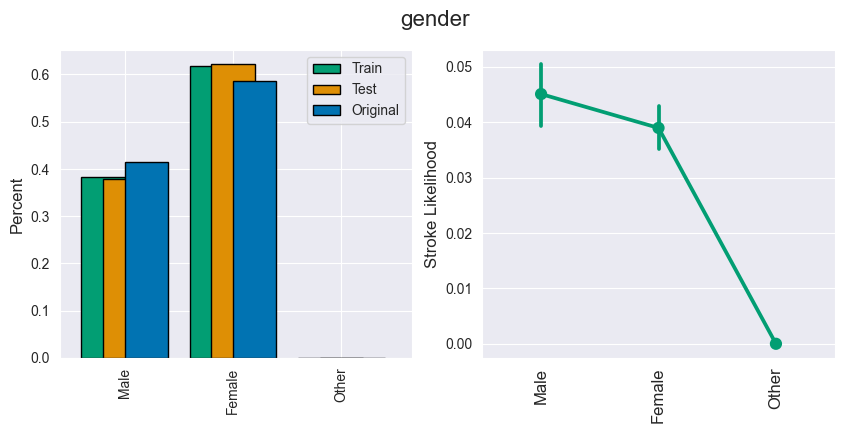

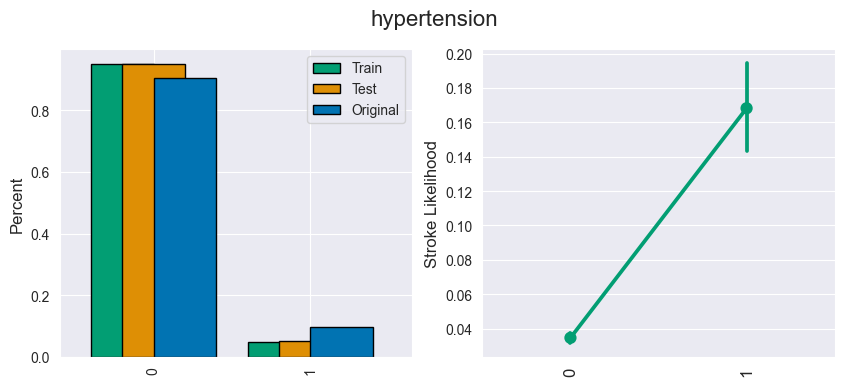

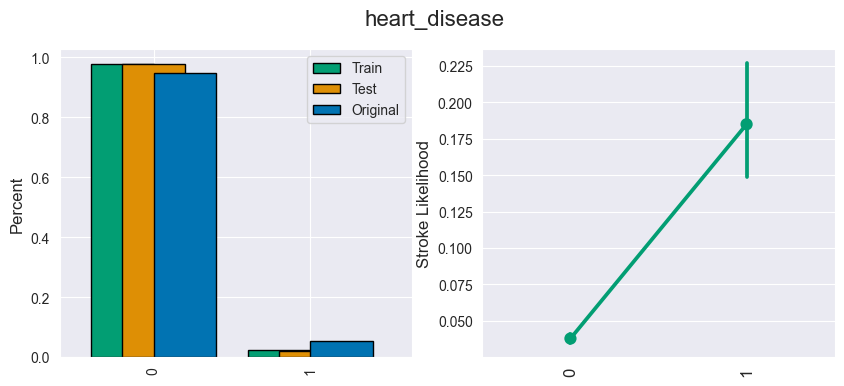

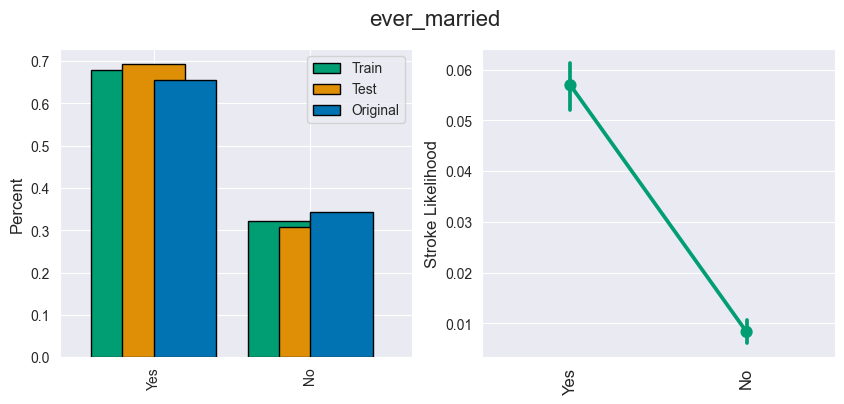

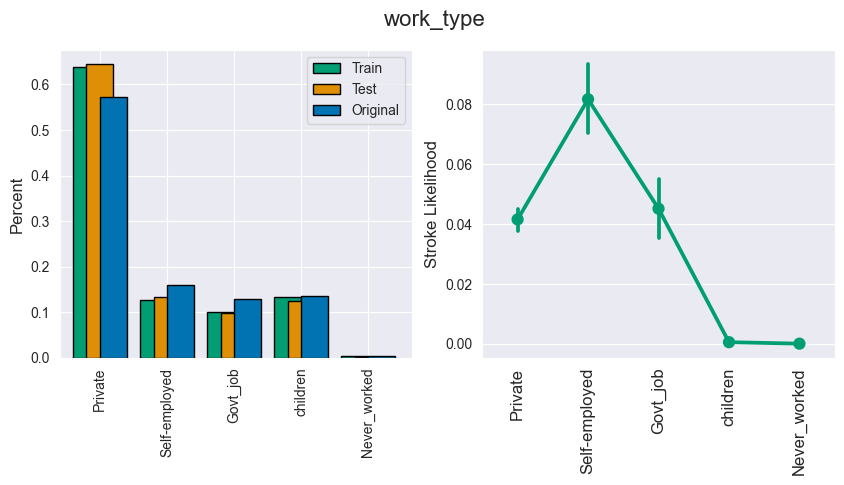

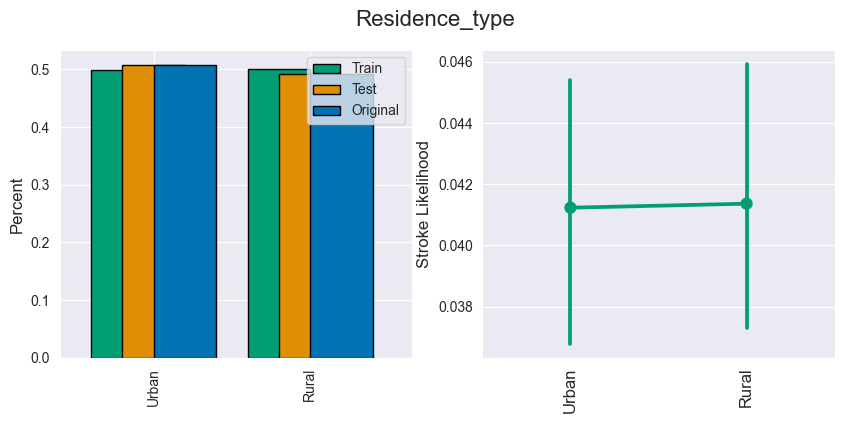

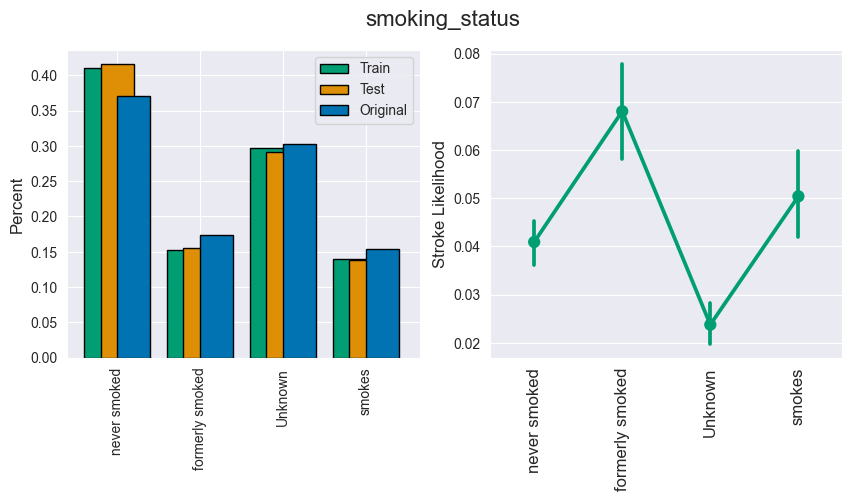

In [9]:
# categorical valiables
col=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']



data = []
for i in col:

    # xticks
    xticks_train = list(df_train[i].unique())
    xticks_test = list(df_test[i].unique())
    xticks_original = list(df_original[i].unique())
    # merge xticks_train, xticks_test, xticks_original
    xticks = list(OrderedDict.fromkeys(xticks_train + xticks_test + xticks_original))
    if all([str(item).isdigit() for item in xticks]): xticks.sort()

    # figure, axes
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # figure title
    fig.suptitle(i, fontsize=16)
    
    # train / test / original differences
    pct_train = df_train[i].value_counts(normalize=True).reindex(xticks)
    pct_test = df_test[i].value_counts(normalize=True).reindex(xticks)
    pct_original = df_original[i].value_counts(normalize=True).reindex(xticks)
    pct_train.plot(kind='bar', align='edge', width=-0.4, ax=ax[0], color=colors[2], edgecolor='black')
    pct_test.plot(kind='bar', align='center', width=0.4, ax=ax[0], color=colors[1], edgecolor='black')
    pct_original.plot(kind='bar', align='edge', width=0.4, ax=ax[0], color=colors[0], edgecolor='black')
    ax[0].set_xlim(-0.6) 
    ax[0].set_ylabel('Percent', fontsize=12)
    ax[0].legend(['Train', 'Test', 'Original'])

    # stroke likelihood
    sns.pointplot(data=df_train, x=i, y='stroke', color=colors[2], ax=ax[1])
    ax[1].tick_params(axis='x', labelsize=12, rotation=90)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Stroke Likelihood', fontsize = 12)
    
    

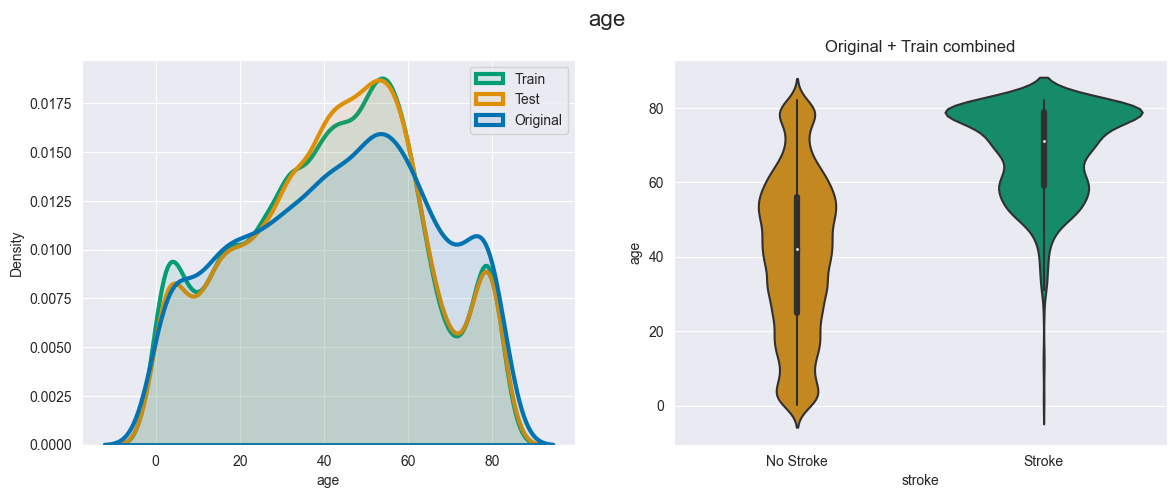

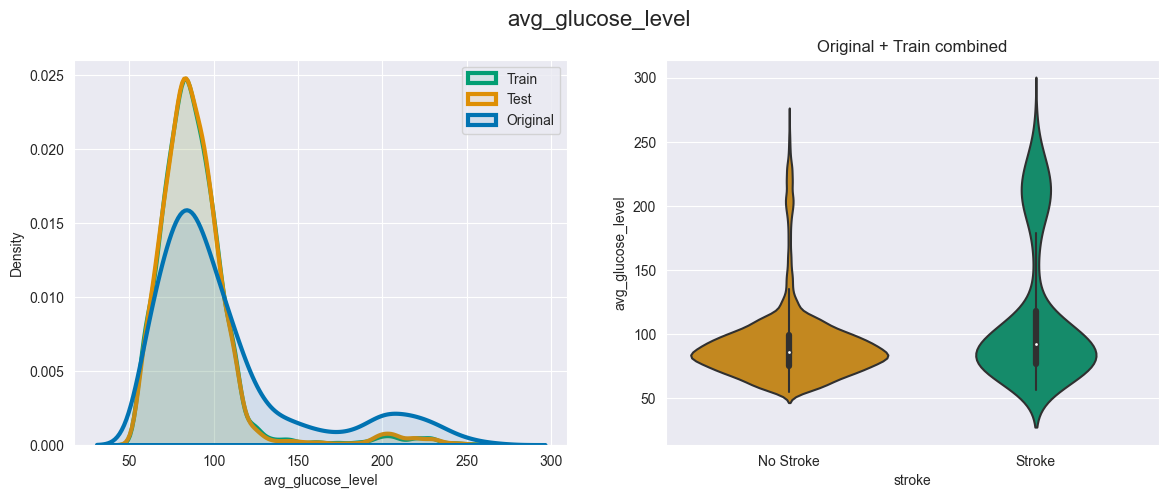

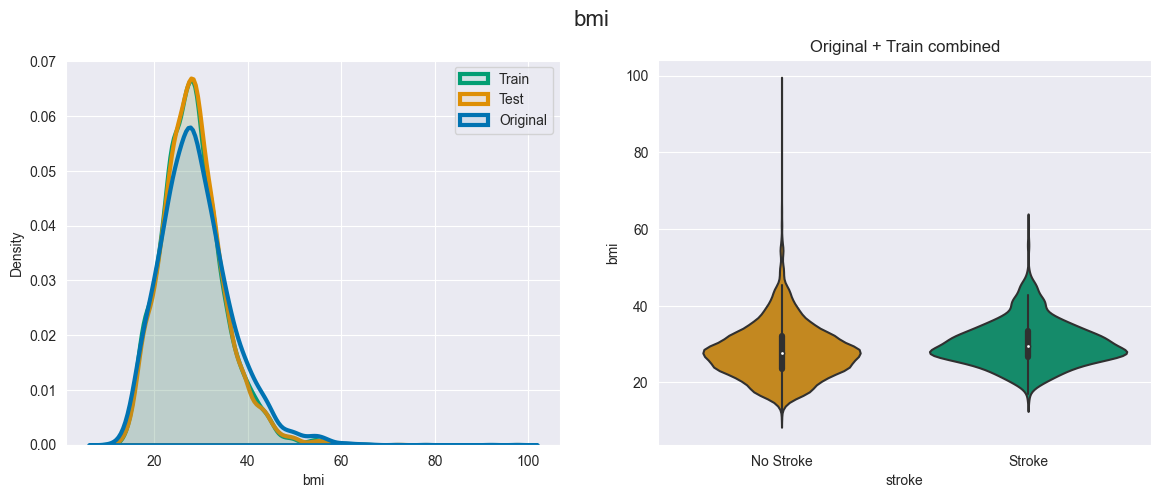

In [10]:
col = ['age', 'avg_glucose_level', 'bmi']

for i in col:
    
    # figure, axes
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    # figure title
    fig.suptitle(i, fontsize=16)

    # train / test / original differences
    sns.kdeplot(df_train[i], fill=True, color=colors[2], ax=ax[0], label='Train', alpha=0.1, linewidth=3)
    sns.kdeplot(df_test[i], fill=True, color=colors[1], ax=ax[0], label='Test', alpha=0.1, linewidth=3)
    sns.kdeplot(df_original[i], fill=True, color=colors[0], ax=ax[0], label='Original', alpha=0.1, linewidth=3)
    ax[0].set_xlabel(i)
    ax[0].set_ylabel('Density')
    handles, labels = ax[0].get_legend_handles_labels()
    ax[0].legend(handles, labels)
    
    #violin plot
    sns.violinplot(y=i, x='stroke', data=df_combined, width=0.8, ax=ax[1], palette=colors[1:3], linewidth=1.5)
    ax[1].set_ylabel(i)
    ax[1].set_xticklabels(['No Stroke', 'Stroke'])
    ax[1].set_title('Original + Train combined')

# Correlation Matrix

C:\Users\burak\AppData\Local\Temp\ipykernel_28952\3064630371.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combined.drop(['id'],axis=1).corr(method='spearman')


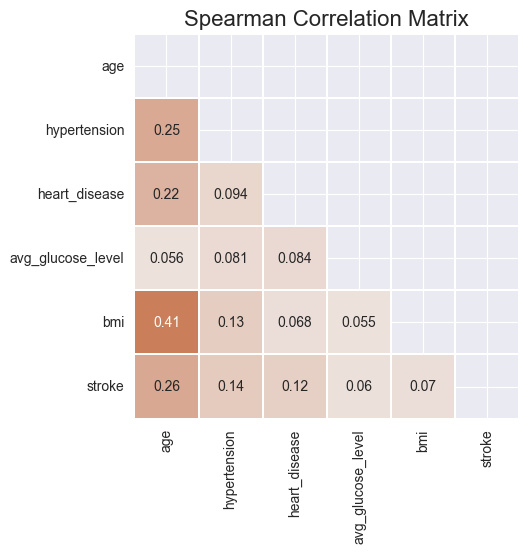

In [11]:
sns.set_style('darkgrid')
fig, ax[0] = plt.subplots(1, 1, figsize=(5,5))

# Spearman Correlation Matrix
correlation_matrix = df_combined.drop(['id'],axis=1).corr(method='spearman')
sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(10, 30, s=60, l=60, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax[0],
    annot=True,
)
ax[0].set_title('Spearman Correlation Matrix', fontsize=16)

plt.show()